In [ ]:
# ===============================================================
# ===============================================================
# === NOTEBOOK FOR COMPUTING THE TRANSFER LEARNING ROC CURVES ===
# ===                    FOR SITE SEQ                         ===
# ===============================================================
# ===============================================================

__date__= '4-Apr-22'
__author__='jeremy charlier'
__revised__='21-Jan-23'

"""comments
the encoder class is inherited from
[1]: "CRISPR-Net: A Recurrent Convolutional Network Quantiﬁes
CRISPR Off-Target Activities with Mismatches and Indels", J. Lin et al
https://onlinelibrary.wiley.com/doi/epdf/10.1002/advs.201903562
"""

import sys
path_to_module = 'MODULE_PATH'   # append drive directory to python sys path
sys.path.append(path_to_module)
sys.path.append(path_to_module+'/code/')   # location of python source code
sys.path.append(path_to_module)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
from transferlearning_datapipeline import getEncodedData
from simanalysis import getBootStrappedData, buildBootData
from transferlearning_modelpipeline import modelpipeline
import transferlearning_utils as tlrn
import transferlearning_tensorflow_models as tf_models
from pipelineModelsLoadSiteSeq import getModels
#
p = print

In [ ]:
# === VARIABLE INITIALIZATION ===
idata = 2 # for training on Site Seq
is_verbose_training = False
#
# === DATA PIPELINE ===
dataBunch = getEncodedData(dataSetPosition = idata)
encdata, data = dataBunch.encdata, dataBunch.data
xtrain, xtest = dataBunch.xtrain, dataBunch.xtest
ytrain, ytest = dataBunch.ytrain, dataBunch.ytest
xtrainres, ytrainres = dataBunch.xtrainres, dataBunch.ytrainres
#
# === GET TRAINED MODELS ===
allmodels = getModels(path_to_module, encdata, idata)

=== LOADING MLP 1 LAYER ===
=== LOADING MLP 2 LAYERS ===
=== LOADING RANDOM FOREST ===
=== LOADING LOGISTIC REGRESSION ===
=== LOADING FNN 3 LAYERS ===
171/171 [==============================] - 2s 2ms/step
> best roc auc FFN3: 0.761
=== LOADING FNN 5 LAYERS ===
171/171 [==============================] - 0s 2ms/step
> best roc auc FFN5: 0.738
=== LOADING FNN 10 LAYERS ===
171/171 [==============================] - 0s 2ms/step
> best roc auc FFN10: 0.689
171/171 [==============================] - 5s 2ms/step
> best roc auc CNN3: 0.79
171/171 [==============================] - 1s 2ms/step
> best roc auc CNN5: 0.809
171/171 [==============================] - 1s 3ms/step
> best roc auc CNN10: 0.768
171/171 [==============================] - 1s 3ms/step
> best roc auc LSTM3: 0.862
171/171 [==============================] - 1s 3ms/step
> best roc auc GRU3: 0.852


=== MODEL TRAINING ON SITE SEQ ===


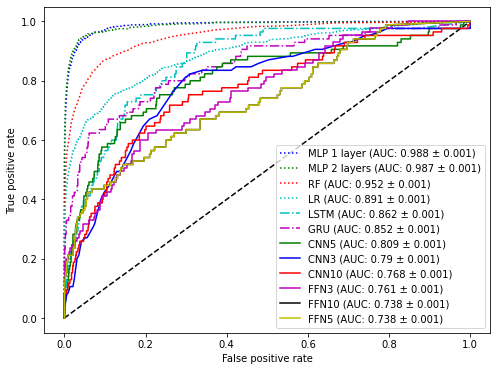

In [ ]:
# ===     PLOT ROC CURVE     ===
# ==============================
print('=== MODEL TRAINING ON SITE SEQ ===')
clfs_to_plot = [
  allmodels.mlp, # .988
  allmodels.mlp2, # .987
  allmodels.rf, # .952
  allmodels.lr, # .891
  allmodels.lstm3, # .862
  allmodels.gru3, # .852
  allmodels.cnn5, # .809
  allmodels.cnn3, # .79
  allmodels.cnn10, # .768
  allmodels.fnn3, # .761
  allmodels.fnn10, # .738
  allmodels.fnn5, # .738
]
# manage labels and color for plot
ucolor = [
  ['MLP 1 layer', 'b:'],
  ['MLP 2 layers', 'g:'],
  ['RF', 'r:'],
  ['LR', 'c:'],
  ['LSTM', 'c-.'],
  ['GRU', 'm-.'],
  ['CNN5', 'g-'],
  ['CNN3', 'b-'],
  ['CNN10', 'r-'],
  ['FFN3', 'm-'],
  ['FFN10', 'k-'],
  ['FFN5', 'y-'],
]
tlrn.plotRocCurve(clfs_to_plot, ucolor, False)

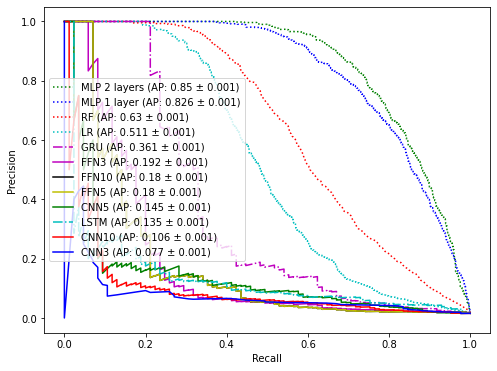

In [ ]:
# ===     PLOT PRECISION RECALL CURVE     ===
# ===========================================
#
estList = [
    allmodels.mlp, allmodels.mlp2, allmodels.rf, allmodels.lr,
    allmodels.fnn3, allmodels.fnn5, allmodels.fnn10,
    allmodels.cnn3, allmodels.cnn5, allmodels.cnn10,
    allmodels.lstm3, allmodels.gru3
]
estList = tlrn.computeAveragePrecisionScore(estList)
# >>> results post-processing <<<
mlp, mlp2 = estList[0], estList[1]
rf, lr = estList[2], estList[3]
fnn3, fnn5, fnn10 = estList[4], estList[5], estList[6]
cnn3, cnn5, cnn10 = estList[7], estList[8], estList[9]
lstm3, gru3 = estList[10], estList[11]
#
ucolor = [
  ['MLP 2 layers', 'g:'], # .85
  ['MLP 1 layer', 'b:'], # .826
  ['RF', 'r:'], # .63
  ['LR', 'c:'], # .511
  ['GRU', 'm-.'], # .361
  ['FFN3', 'm-'], # .192
  ['FFN10', 'k-'], # .18
  ['FFN5', 'y-'], # .18
  ['CNN5', 'g-'], # .145
  ['LSTM', 'c-.'], # .135
  ['CNN10', 'r-'], # .106
  ['CNN3', 'b-'], # .077
]
estSorted = [
  mlp2,
  mlp,
  rf,
  lr,
  gru3,
  fnn3,
  fnn10,
  fnn5,
  cnn5,
  lstm3,
  cnn10,
  cnn3,
]
tlrn.plotPRCurve(estSorted, ucolor)

In [ ]:
# ==============================================
# ==============================================
# ===     TRANSFER LEARNING EXPERIMENTS      ===
# ==============================================
# ==============================================
#
# === GET BOOTSTRAPPED DATA SETS ===
bootdata = buildBootData(encdata)

=== TRANSFER LEARNING ON CD33 BOOTSTRAPPED DATA ===
32/32 [==============================] - 0s 3ms/step
=== TRANSFER LEARNING ON CIRCLE SEQ BOOTSTRAPPED DATA ===
32/32 [==============================] - 0s 3ms/step
=== TRANSFER LEARNING ON SITE SEQ BOOTSTRAPPED DATA ===
32/32 [==============================] - 0s 3ms/step
=== TRANSFER LEARNING ON ELEVATION GUIDE SEQ BOOTSTRAPPED DATA ===
32/32 [==============================] - 0s 3ms/step
=== TRANSFER LEARNING ON 22GRNA BOOTSTRAPPED DATA ===
32/32 [==============================] - 0s 3ms/step
=== TRANSFER LEARNING ON 5GRNA BOOTSTRAPPED DATA ===
32/32 [==============================] - 0s 3ms/step
=== TRANSFER LEARNING ON ELEVATION HMG BOOTSTRAPPED DATA ===
32/32 [==============================] - 0s 3ms/step


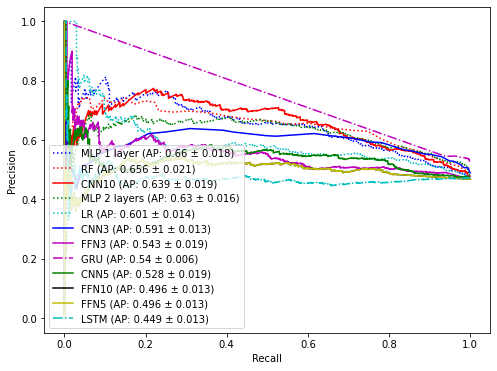

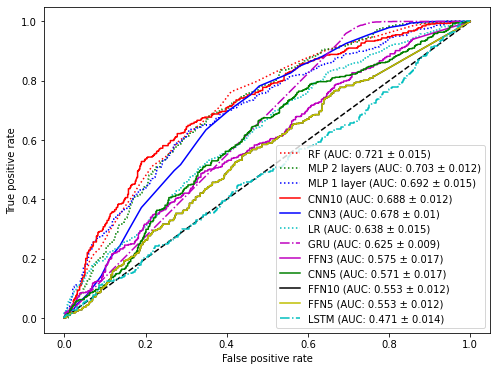

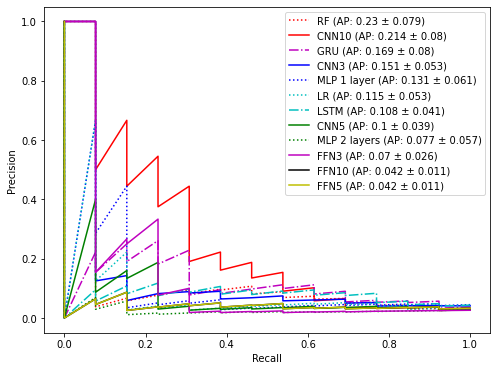

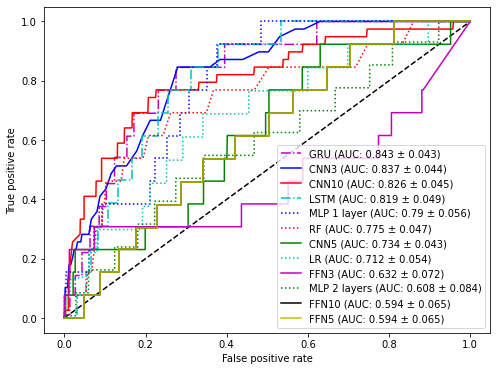

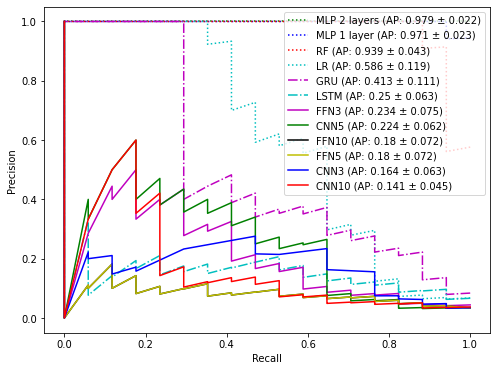

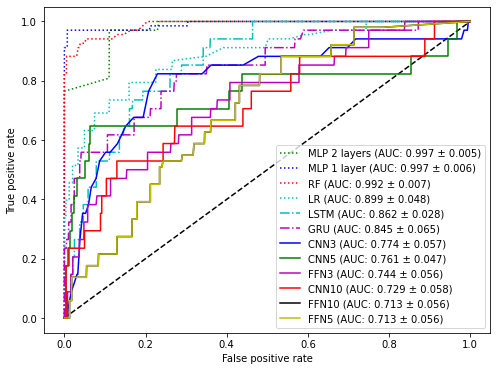

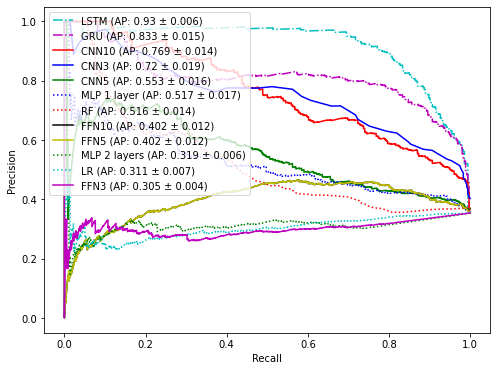

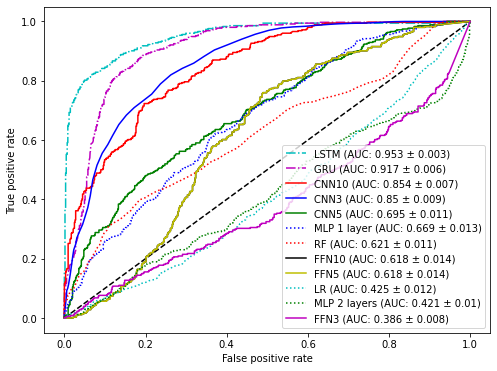

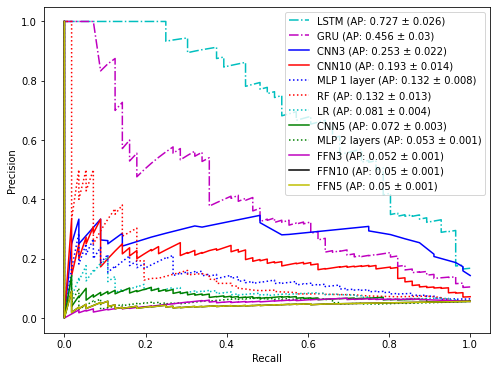

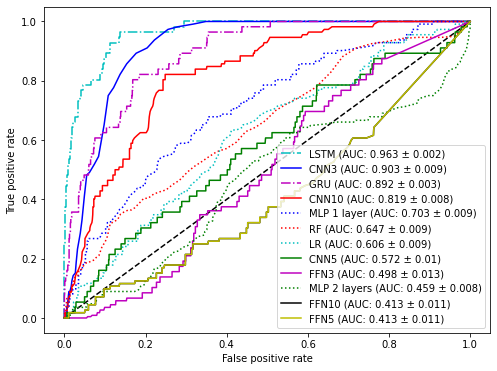

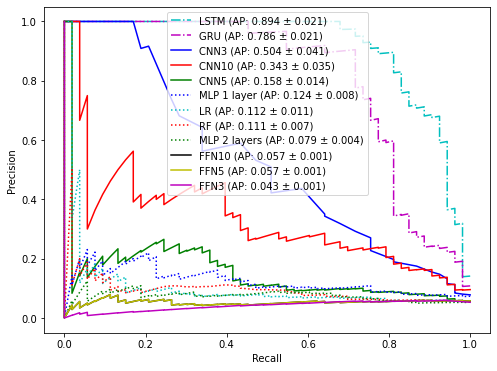

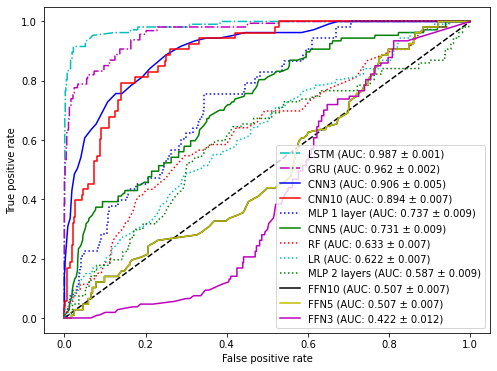

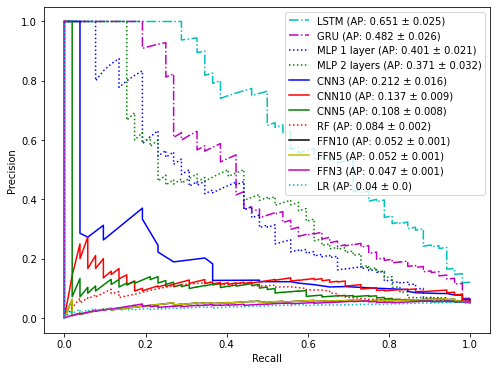

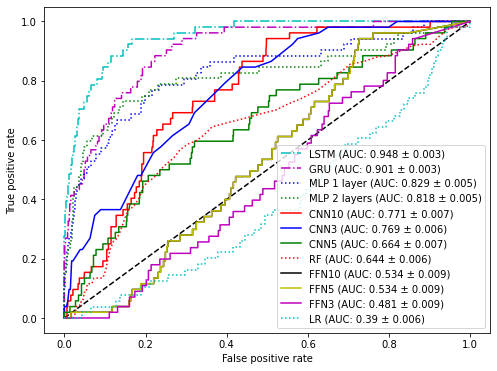

In [ ]:
# === COMPUTE METRICS ON BOOTSTRAPPED DATA SETS ===
# =================================================
for whichTLdataset in range(0, 7):
  # whichTLdataset -> choose the TL exp., possible values {0, ..., 6}
  dictMetrics = tlrn.computeMetricsForTLplotV2(
    bootdata.cd33_boots, bootdata.circle_boots, bootdata.site_boots,
    bootdata.elev_gseq_boots, bootdata.grna22_boots, bootdata.grna5_boots,
    bootdata.elev_hmg_boots,
    whichTLdataset,
    allmodels.mlp, allmodels.mlp2, allmodels.rf, allmodels.lr,
    allmodels.fnn3, allmodels.fnn5, allmodels.fnn10,
    allmodels.cnn3, allmodels.cnn5, allmodels.cnn10,
    allmodels.lstm3, allmodels.gru3)
  # === PLOTS ===
  tlrn.pipelinePlotsTL(
    whichTLdataset, dictMetrics, scoringMetric = 'avgprecscores'
  )
  tlrn.pipelinePlotsTL(
    whichTLdataset, dictMetrics, scoringMetric = 'roc_auc'
  )